# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [1]:
! git clone https://www.github.com/Jmazher12/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 45 (delta 11), reused 6 (delta 6), pack-reused 30
Unpacking objects: 100% (45/45), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

 1. Read the abstract. What is this paper about? **This paper discusses the ways a data scientist can efficiently clean or "tidy" data, which can lead to more accurate - and fun - data analysis**
 2. Read the introduction. What is the "tidy data standard" intended to accomplish? **The "tidy data standard" is intended to provide data scientists a framework through which they can clean data. With this algorithmic approach to cleaning data, people wouldn't have to worry about figuring out where to start when it comes to cleaning data, they simply follow the tidy data standard**
 3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." **This means that messy datasets often have a unique problem that makes them messy, which therefore complicates the cleaning process for someone who has never encountered that specific problem before** What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." **Oftentimes, having to isolate a given variable/observation in a way in which a computer can understand is difficult and frustrating, especially when as a human our brains automatically can detect a problem fairly quickly.**
 4. Read Section 2.2. How does Wickham define values, variables, and observations? **Values are defined as a collection of quantitative numbers or qualitative strings. Variables are defined as values that measure the same underlying attribute across units, such as height, temp., etc. An observation however measures all values on the same unit across attributes.**
 5. How is "Tidy Data" defined in section 2.3? **A "tidy" data set's variables will each form a column, each observation will form a row, and the type of observational unit will form a table**
 6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? **The five most common problems with messy datasets are: 1. Column headers are values and not variable names 2. Multiple variables are stoerd in one column 3. Variables are stored in both rows and columns 4. Multiple types of observational units are stored in the same table 5. A single observational unit is stored in multiple tables.** Why are the data in Table 4 messy? **The data are messy because there are variables that can be condensed into one column, rather than spread out throughout the table.** What is "melting" a dataset? **"Melting" a dataset is whenever we stack variables and observations that are redudantly placed across a table. This allows for a more condensed and easy-to-read table.**
 7. Why, specifically, is table 11 messy but table 12 tidy and "molten"? **Table 11 is messy because there is a column for each possible day in the month, which can be combined with the year and month column in order to create one condensed column. Meanwhile table 12 does this and creates a singular variable called "date". Additionally table 12 has two columns that distinct that maximum and minimum temperature on a given date, making the information more tidy and easy to understand**
 8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? **The "chicken-and-egg" problem is that if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This means that we might find ourself spending time on organizing the tidy data tools themselves rather than the explicit data on-hand...** What does Wickham hope happens in the future with further work on the subject of data wrangling? **Wickham hopes that others will build upon this tidy data framework and design new tools/methodologies in which one can effectively organize data**

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

(30478,)
object
AxesSubplot(0.125,0.125;0.775x0.755)
float64
Total Missings: 
 181 



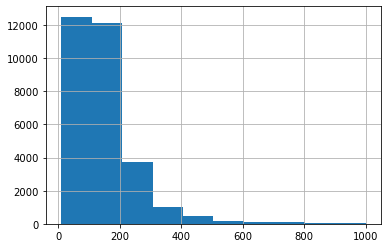

In [7]:
import numpy as np
import pandas as pd


#Q2 part 1:
bnb_data = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)
print(bnb_data["Price"].shape)
print(bnb_data["Price"].dtypes)
# print(bnb_data["Price"].describe())
# print(bnb_data["Price"].hist())

# First, the commas are messing it up, so I'll need to get rid of them
# Second, "Price" is listed as an object, it should be a numeric type

bnb_data["Price"].str.replace(",","")
bnb_data["Price"] = pd.to_numeric(bnb_data["Price"], errors='coerce')

print(bnb_data["Price"].hist())
# This histogram looks significantly cleaner than the original one

print(bnb_data["Price"].dtypes)
# The "Price" variable has been correctly chagned to a float type

bnb_data["Price"+"_nan"] = bnb_data["Price"].isnull()
print("Total Missings: \n", sum(bnb_data["Price"+"_nan"]),"\n")


['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Boatomg                   1
Unverified                1
Under investigation       1
Unconfirmed               1
Name: Type, dtype: int64 

Unprovoked      4716
Provoked         593
Invalid          552
Sea Disaster     239
Watercraft       142
Boat             110
Boating           92
Name: Type, dtype: int64 

Unprovoked      4716
Provoked         593
Sea Disaster     239
Watercraft       142
Boat             110
Boating           92
Name: Type, dtype: int64 

Unprovoked    4716
Provoked      1176
Name: Type, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


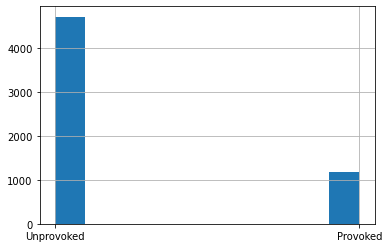

In [26]:
#Q2 part 2:
df = pd.read_csv('./data/sharks.csv', low_memory=False)
var = "Type"
print(df[var].unique(), '\n')
print(df[var].value_counts(), '\n')

# I noticed that the categories that appear 1 or 10 times means they probably aren't
# that important in the grand scheme of things, so I can just turn those into nans

df[var] = df[var].replace("Questionable", np.nan).replace("Unverified", np.nan).replace("Under investigation",np.nan).replace("Unconfirmed",np.nan)
df[var] = df[var].replace("Boatomg", "Boat")
print(df[var].value_counts(), '\n')

# When looking at the "invalid" category, I noticed that the injury was reported as being caused
# by a shark, but it was actually caused by something else like a stingray. This means that it isn't really relevant to
# whether or not a human provoked a shark or vice versa, so I can turn "invalid" into nan

df[var] = df[var].replace("Invalid", np.nan)
print(df[var].value_counts(), '\n')

# When looking at the "Sea Disaster" category, I noticed that it was reffering to incidents where a boat capsized or aggravated the sharks,
# thus I can combine this category with "Watercraft", "Boat", and "Boating" since these categories are all referring to shark attacks related to boats.
# Additionally, since boats are technically made by humans, we can say that these shark attacks were provoked because the boats were causing a disturbance
# to the sharks leading to attacks, meaning that I can classify the aforementioned categories as "Provoked"

df[var] = df[var].replace("Sea Disaster","Provoked").replace("Watercraft","Provoked").replace("Boat","Provoked").replace("Boating","Provoked")
print(df[var].value_counts(), '\n')

# Now, the "Type" column only has two categories within it, provoked and unprovoked, which makes it much simpler to understand
# whether or not the sharks were provoked or unprovoked to attack the people

print(df[var].hist())


[9 0 1]
1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64
1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


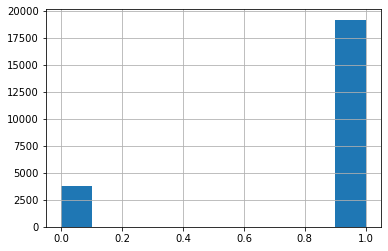

In [33]:
#Q2 part 3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory=False)
var = "WhetherDefendantWasReleasedPretrial"
print(df[var].unique())
print(df[var].value_counts())

# When looking at the codebook for the pretrial data, it says that the '9' means that it is unclear whether or not
# an individual was released or unreleased. Since there are only 31 of these cases, we can turn the '9' category into nans

df[var] = df[var].replace(9, np.nan)
print(df[var].value_counts(), '\n')
print(df[var].hist())

# Now we can see that more individuals have been released than unreleased


In [34]:
#Q2 part 4
df = pd.read_csv(url, low_memory=False)
var = "ImposedSentenceAllChargeInContactEvent"
print(df[var].unique())

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.